In [44]:
# imports
# from openai import OpenAI
import statistics
import pandas as pd
import json
import jsonlines

from datetime import datetime

import seaborn as sns
import matplotlib.pyplot as plt
from textwrap import wrap
from ctypes import alignment
import numpy as np

# graphs n stuff

In [45]:
data = pd.read_csv(r"C:\Users\llste\Desktop\LLM-Ethics-1\lorraine_paper2\results\simple_combined.csv")

C:\Users\llste\AppData\Local\Temp\ipykernel_5564\3251349271.py:1: DtypeWarning: Columns (2,8) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(r"C:\Users\llste\Desktop\LLM-Ethics-1\lorraine_paper2\results\simple_combined.csv")


In [46]:
data.head()

,Unnamed: 0.1,Unnamed: 0,politics,alignment,category,response,source,model,temperature,nickname,trial,origin
0,0,0.0,Strongly Liberal,liberal,harm,2.00,human,homo sapiens neurons,NaN,human,1,NaN
1,1,1.0,Strongly Liberal,liberal,harm,3.00,human,homo sapiens neurons,NaN,human,1,NaN
2,2,4.0,Strongly Liberal,liberal,harm,4.00,human,homo sapiens neurons,NaN,human,1,NaN
3,3,5.0,Strongly Liberal,liberal,harm,1.25,human,homo sapiens neurons,NaN,human,1,NaN
4,4,6.0,Strongly Liberal,liberal,harm,4.00,human,homo sapiens neurons,NaN,human,1,NaN


In [47]:
vicuna = data.loc[data['model'] == 'vicuna']
vicuna = vicuna.drop(["Unnamed: 0","Unnamed: 0.1"], axis=1)

In [48]:
vicuna["response"] = vicuna["response"] + 1
vicuna["source"] = vicuna["source"].str.title()
vicuna["alignment"] = vicuna["alignment"].str.title()
vicuna["category"] = vicuna["category"].str.title()

In [56]:
vicuna.response.unique()

array([6., 1., 4., 5., 2., 3.])

In [49]:
vicuna.head()

,politics,alignment,category,response,source,model,temperature,nickname,trial,origin
6694,NaN,Liberal,Harm,6.0,Persona,vicuna,base,NaN,0,NaN
6695,NaN,Liberal,Harm,6.0,Persona,vicuna,base,NaN,1,NaN
6696,NaN,Liberal,Harm,6.0,Persona,vicuna,base,NaN,2,NaN
6697,NaN,Liberal,Harm,6.0,Persona,vicuna,base,NaN,3,NaN
6698,NaN,Liberal,Harm,6.0,Persona,vicuna,base,NaN,4,NaN


In [73]:
def single_pillar_boxplot(df, ax=None, title="", show_legend=False):
    sns.set_theme(font_scale=3)

    if ax is None:
        fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 15))

    sns.boxplot(data=df, x="source", y="response", hue='alignment', palette=my_pal, whis=(0, 95), ax=ax)

    # if not show_legend:
    #     ax.get_legend().remove()
        
	# ax.refline(x = 20,
    #       color = "blue",
    #       lw = 3)

    ax.set_xlabel('')
    ax.set_ylabel('Response', fontsize=35)
    ax.set_title(title.title(),fontsize=50)
    ax.tick_params(axis='both', which='major', labelsize=25)
    ax.tick_params(axis='x', which='minor', labelsize=30)
    # ax.fontsize=50
    return ax

0
1
2
3
4


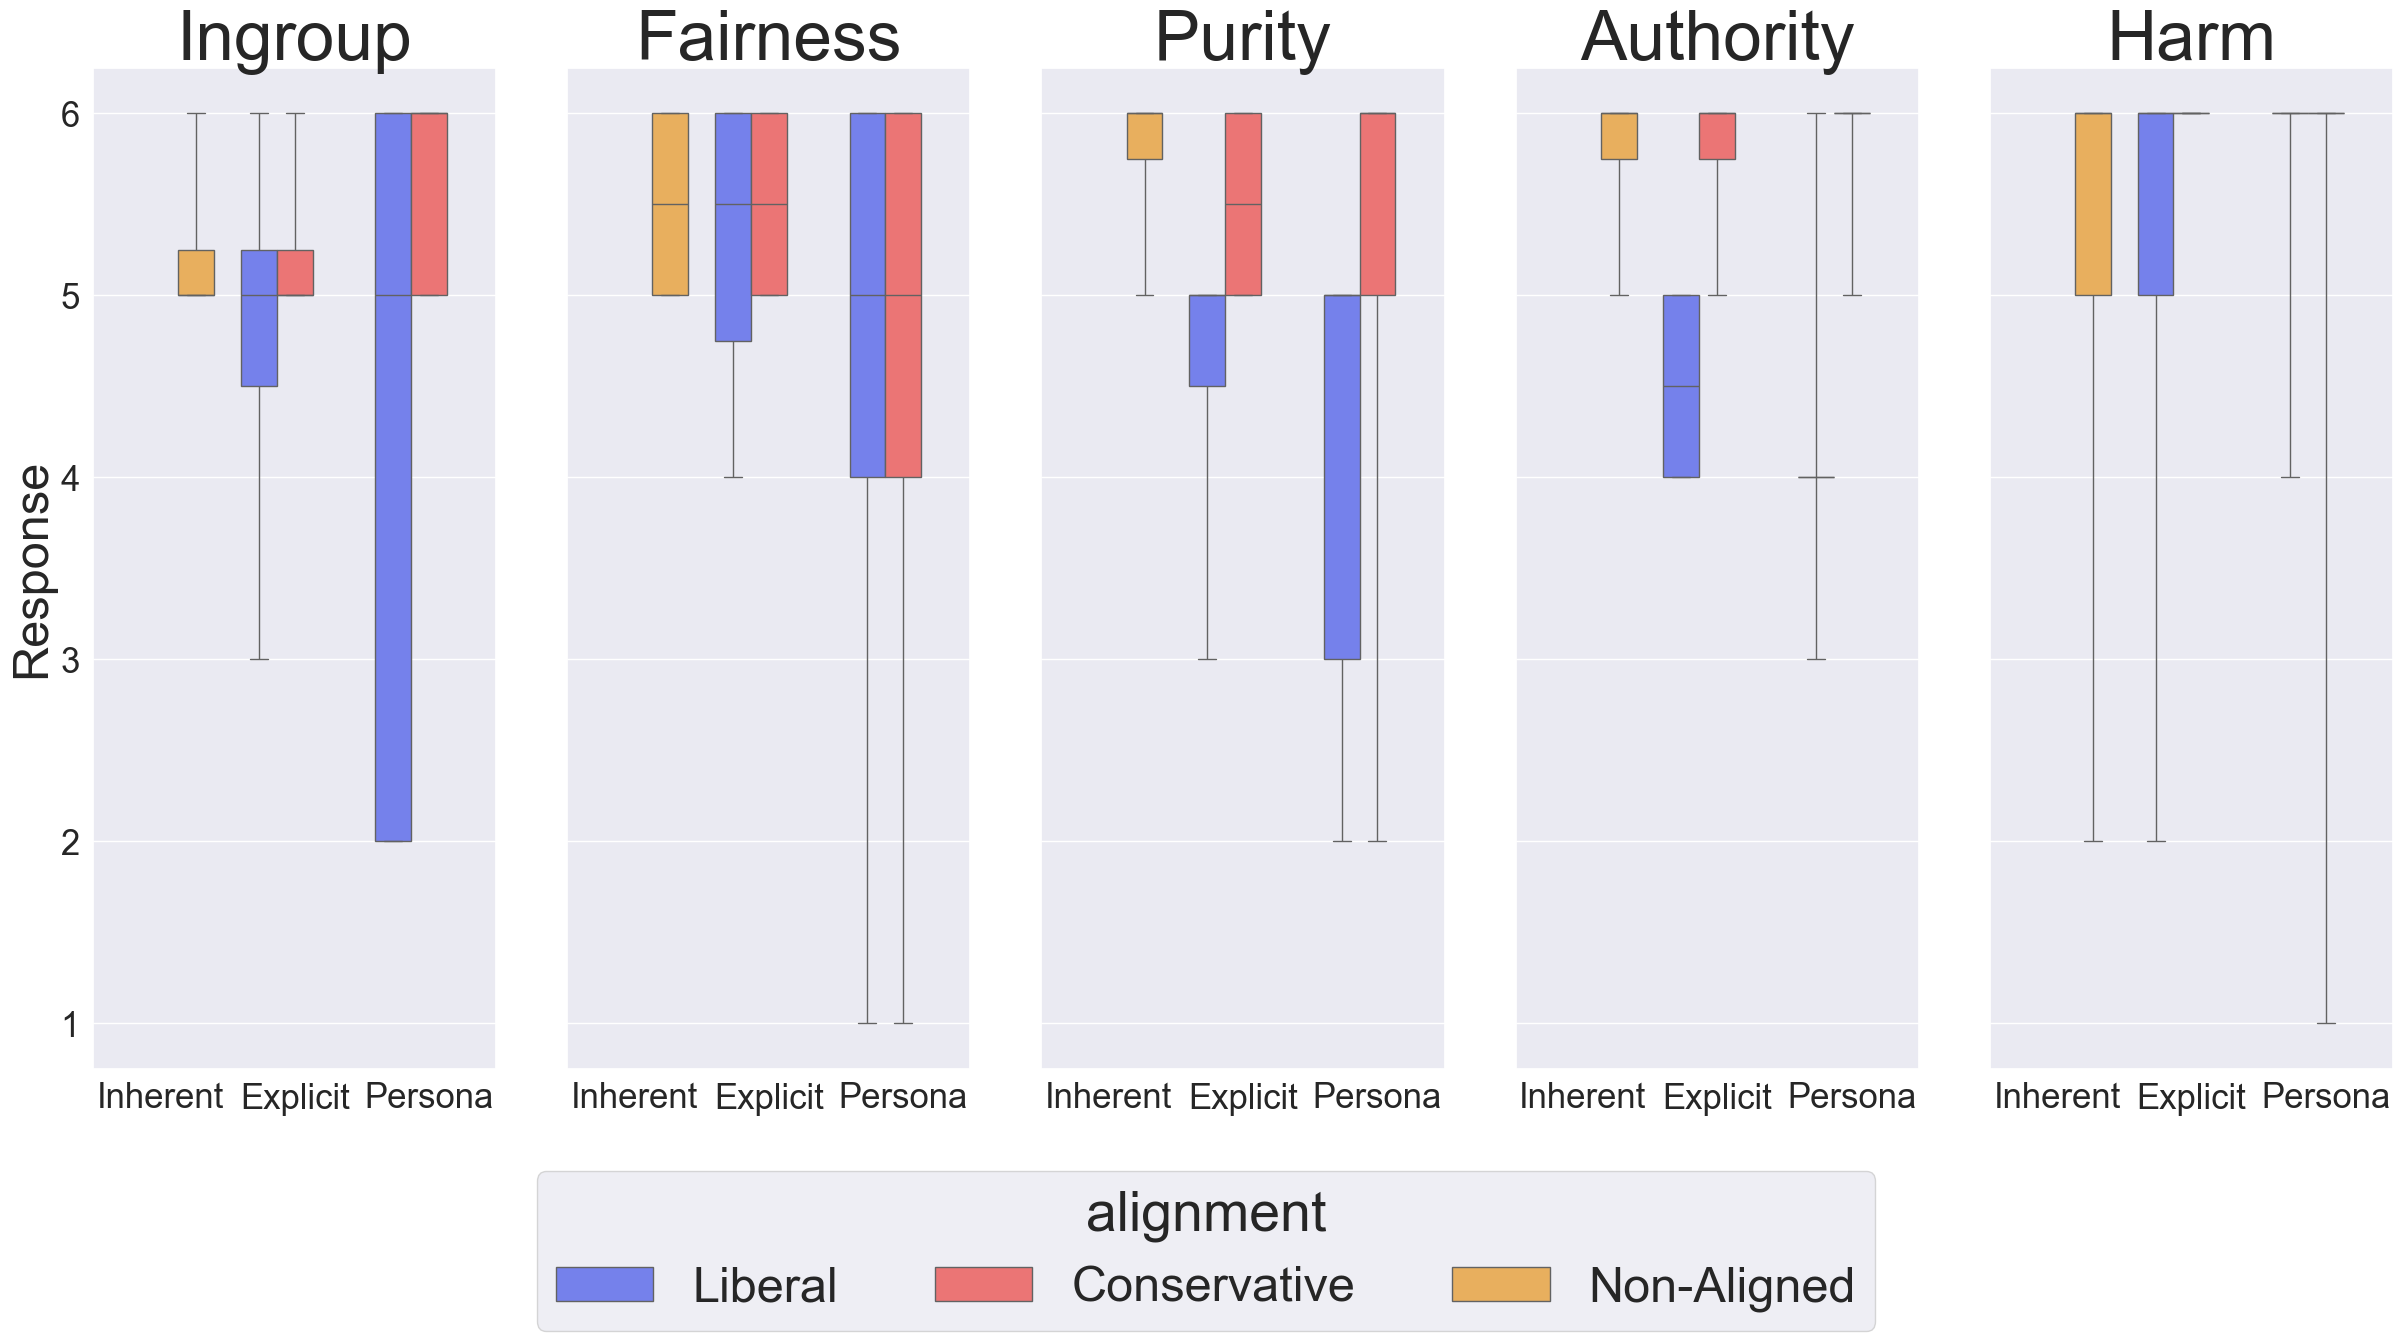

In [75]:
my_pal = {"Conservative": "#ff6161", "Liberal": "#6171ff", 'Non-Aligned':"#ffb347"}

def graph_all(df):
    # cats = df['category'].unique()
    # df = df[df['model'] == model]
    cats = ['Ingroup', 'Fairness', 'Purity', 'Authority', 'Harm']
    # alignments = df['alignment'].unique()
    # sources = df['source'].unique()
    df['source'] = pd.Categorical(df['source'], categories=['Inherent', 'Explicit', 'Persona'], ordered=True)

    fig, axes = plt.subplots(1, len(cats), figsize=(5*len(cats), 15), sharey=True)

    for i, (cat, ax) in enumerate(zip(cats, axes)):
        print(i)
        # Only show y-label on first plot
        if i > 0:
            ax.set_ylabel('')

        df_filtered = df[df['category'] == cat]
        ax = single_pillar_boxplot(df_filtered, ax,  cat, cat == 'ingroup')

        if i == 0:
            f_legend = ax.legend_
        
        ax.get_legend().remove()
        
    
    fig.legend(f_legend.legend_handles, [t.get_text() for t in f_legend.texts], 
          title=f_legend.get_title().get_text(),
          title_fontsize=40,
          fontsize=35,
          loc='upper center', 
          bbox_to_anchor=(0.5, 0.15),  # Centered at bottom of figure
          ncol=3)  # Display all alignment categories in one row

    # Add a common x-label for all subplots
    # fig.text(0.5, 0.105, 'source', ha='center', fontsize=15)
    fig.suptitle("")
    
    # Adjust layout - leave space at bottom for common x-label and legend
    fig.tight_layout(rect=[0, 0.135, 1, 0.98])

graph_all(vicuna)